In [28]:
import numpy as np


In [ ]:
data = [ {
    'name': 'my_point_cloud',
    'points': np.random.rand(100,3).astype(np.float32),
    'point_attr1': np.random.rand(100).astype(np.float32),
    } ]

vis = ml3d.vis.Visualizer()
vis.visualize(data)

In [ ]:
import open3d as o3d
import open3d.visualization.gui as gui

app = gui.Application.instance
app.initialize()

w = app.create_window("Open3D - 3D Labels", 1024, 768)
widget3d = gui.SceneWidget()
w.add_child(widget3d)
widget3d.scene = o3d.visualization.rendering.Open3DScene(w.renderer)

# Add torus
torus = o3d.geometry.TriangleMesh.create_torus()
torus.compute_vertex_normals()
#mat = o3d.visualization.rendering.Material()
#mat.shader = "defaultLit"
widget3d.scene.add_geometry("Torus", torus)#, mat)

# Add torus vertices
pts = o3d.geometry.PointCloud(torus.vertices)
#mat = o3d.visualization.rendering.Material()
#mat.shader = "defaultUnlit"
#mat.point_size = 5 * w.scaling
#mat.base_color = (0, 0, 0, 1)
widget3d.scene.add_geometry("Points", pts)#, mat)


# Add 3D labels
for i in range(0, len(torus.vertices)):
    widget3d.add_3d_label(torus.vertices[i], str(i))
bounds = widget3d.scene.bounding_box
widget3d.setup_camera(60, bounds, bounds.get_center())

app.run()

In [9]:
def make_point_cloud(npts, center, radius):
    pts = np.random.uniform(-radius, radius, size=[npts, 3]) + center
    cloud = o3d.geometry.PointCloud()
    cloud.points = o3d.utility.Vector3dVector(pts)
    colors = np.random.uniform(0.0, 1.0, size=[npts, 3])
    cloud.colors = o3d.utility.Vector3dVector(colors)
    return cloud


def high_level():
    app = gui.Application.instance
    app.initialize()
    print("Initializied Open3D GUI")
    points = make_point_cloud(1, (0, 0, 0), 1.0)
    print("Initializied Open3D Point Cloud")
    vis = o3d.visualization.O3DVisualizer("Open3D - 3D Text", 1024, 768)
    vis.show_settings = True
    vis.add_geometry("Points", points)
    for idx in range(0, len(points.points)):
        vis.add_3d_label(points.points[idx], "{}".format(idx))

    vis.reset_camera_to_default()
    app.add_window(vis)
    app.run()
high_level()

Initializied Open3D GUI
Initializied Open3D Point Cloud
[Open3D INFO] Window window_6 created.


KeyboardInterrupt: 

In [3]:
from itertools import compress
import torch
pred_dict = {"pred_boxes": torch.rand((20,9)), "pred_labels": torch.randint(0,10,(20,1)),"pred_scores": torch.rand((20,1))}
#%timeit list(compress(pred_dict,pred_dict["pred_labels"]==9))
#%timeitnp.array(list(compress(pred_dict,pred_dict["pred_labels"]==9)))

In [13]:
%timeit np.array(list(compress(pred_dict,pred_dict["pred_labels"]==9)))


1.68 µs ± 10.9 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [24]:
%timeit (np.array(list(compress(pred_dict["pred_boxes"],pred_dict["pred_labels"] in [9]))))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [38]:
classes = [500]
#%timeit indices = [np.nonzero(sum(pred_dict["pred_labels"]==x for x in classes))[0].tolist()]

In [39]:
np.nonzero((sum(pred_dict["pred_labels"]==x for x in classes)))[:,0].tolist()

[]

In [43]:
indices = np.nonzero((sum(pred_dict["pred_labels"]==x for x in classes)))[:,0].tolist()
pred_dict["pred_boxes"][indices,:].tolist()

[]

In [12]:
pd.display

AttributeError: module 'pandas' has no attribute 'display'

In [10]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.randint(100, size=(6,8)))
df.style.highlight_min(color='red',axis=1)

,0,1,2,3,4,5,6,7
0,78,50,57,41,92,85,31,95
1,96,31,50,79,56,79,50,30
2,45,45,96,25,37,42,79,18
3,22,69,95,13,34,54,22,76
4,71,53,23,50,83,36,4,25
5,60,19,16,99,45,88,90,40


In [11]:
!python3 xr_synth_utils.py

Hello World
a: 7.692e-01 s <=> 1.300e+00 Hz
b: 8.110e-02 s <=> 1.233e+01 Hz
c: 1.153e-01 s <=> 8.673e+00 Hz
a: 1.323e-01 s <=> 7.558e+00 Hz
b: 8.477e-01 s <=> 1.180e+00 Hz
c: 7.459e-01 s <=> 1.341e+00 Hz
a: 3.269e-02 s <=> 3.059e+01 Hz
b: 6.908e-01 s <=> 1.448e+00 Hz
c: 6.964e-01 s <=> 1.436e+00 Hz
Table To summarize:
                 a          b          c
average 3.1140e-01 5.3987e-01 5.1919e-01
max     7.6920e-01 8.4770e-01 7.4586e-01
min     3.2688e-02 8.1099e-02 1.1530e-01


In [13]:
!python3 live_predictions.py --cfg_file 'cfgs/nuscenes_models/cbgs_voxel0075_res3d_centerpoint.yaml' --ckpt "../checkpoints/cbgs_voxel0075_centerpoint_nds_6648.pth" --OU_ip "192.168.200.78" --TD_ip "192.168.200.103" --TD_port 7002  --time 5 --visualize --no-save_csv --log_time

/home/linuxjohansson/.local/lib/python3.6/site-packages/numba/core/errors.py:154: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)
2022-06-29 16:27:29,825   INFO  ==> Loading parameters from checkpoint ../checkpoints/cbgs_voxel0075_centerpoint_nds_6648.pth to CPU
2022-06-29 16:27:29,873   INFO  ==> Done (loaded 558/558)
Configuring sensor: 192.168.200.78
2022-06-29 16:27:45,702   INFO  Streaming lidar data to: CenterPoint
2022-06-29 16:27:45,978   INFO  Data Prep: 1.294e-01 s <=> 7.730e+00 Hz
2022-06-29 16:27:45,981   INFO  Load GPU: 2.886e-03 s <=> 3.465e+02 Hz
2022-06-29 16:27:46,118   INFO  Infrence: 1.374e-01 s <=> 7.280e+00 Hz
2022-06-29 16:27:46,118   INFO  Filter Predictions: 3.004e-05 s <=> 3.329e+04 Hz
2022-06-29 16:27:46,118   INFO  Transmit TD: 9.814e-06 s <=> 1.019e+05 Hz
Classes to visualize: ['pedestrian']
2022-06-29 16:27:48,125   INFO  Visualizing lidar data: CenterPoint:


2022-06-29 16:27:48,168   INFO  F

In [175]:
def send():
    pred_dict = {"pred_boxes": torch.rand((20,9)), "pred_labels": torch.randint(0,10,(20,1)),"pred_scores": torch.rand((20,1))}
    if isinstance(pred_dict["pred_labels"],torch.Tensor):
        pred_dict["pred_labels"] = pred_dict["pred_labels"].cpu().numpy()
    classes = [4,5,6]
    indices = np.nonzero(sum(pred_dict["pred_labels"]==x for x in classes))[0].tolist()
    pred_dict["pred_boxes"] = pred_dict["pred_boxes"][indices,:].tolist()
    pred_dict["pred_labels"] = pred_dict["pred_labels"][indices,:].tolist()
    pred_dict["pred_scores"] = pred_dict["pred_scores"][indices,:].tolist()
    for key,value in pred_dict.items():
        print(np.shape(value))
    data = json.dumps(pred_dict).encode('utf-8')
send()

(6, 9)
(6, 1)
(6, 1)


In [3]:
import time
import threading, queue

q = queue.Queue()

def worker():
    while True:
        item = q.get()
        print(f'Working on {item}')
        print(f'Finished {item}')
        q.task_done()

# Turn-on the worker thread.
threading.Thread(target=worker, daemon=True).start()

# Send thirty task requests to the worker.
for item in range(30):
    q.put(item)

# Block until all tasks are done.
start = time.monotonic()
q.join()
print(f'Finished in {time.monotonic() - start} seconds')
print('All work completed')


Working on 0
Finished 0
Working on 1
Finished 1
Working on 2
Finished 2
Working on 3
Finished 3
Working on 4
Finished 4
Working on 5
Finished 5
Working on 6
Finished 6
Working on 7
Finished 7
Working on 8
Finished 8
Working on 9
Finished 9
Working on 10
Finished 10
Working on 11
Finished 11
Working on 12
Finished 12
Working on 13
Finished 13
Working on 14
Finished 14
Working on 15
Finished 15
Working on 16
Finished 16
Working on 17
Finished 17
Working on 18
Finished 18
Working on 19
Finished 19
Working on 20
Finished 20
Working on 21
Finished 21
Working on 22
Finished 22
Working on 23
Finished 23
Working on 24
Finished 24
Working on 25
Finished 25
Working on 26
Finished 26
Working on 27
Finished 27
Working on 28
Finished 28
Working on 29
Finished 29
Finished in 0.006463162000727607 seconds
All work completed


In [8]:
class MyThread(threading.Thread):
    def __init__(self, name, queue):
        threading.Thread.__init__(self)
        self.name = name
        self.queue = queue

    def run(self):
        item = 0
        while True:
            self.queue.put(item)
            print(f'Working on {item}')
            
            print(f'Finished {item}')
a = MyThread("Thread-1", q)
val = a.queue.get()
print(val)
#print("Thread Started")


Working on 0
Finished 0
Working on 0
Finished 0
Working on 0
Finished 0
Working on 0
Finished 0
Working on 0
Finished 0
Working on 0
Finished 0
Working on 0
Finished 0
Working on 0
Finished 0
Working on 0
Finished 0
Working on 0
Finished 0
Working on 0
Finished 0
Working on 0
Finished 0
Working on 0
Finished 0
Working on 0
Finished 0
Working on 0
Finished 0
Working on 0
Finished 0
Working on 0
Finished 0
Working on 0
Finished 0
Working on 0
Finished 0
Working on 0
Finished 0
Working on 0
Finished 0
Working on 0
Finished 0
Working on 0
Finished 0
Working on 0
Finished 0
Working on 0
Finished 0
Working on 0
Finished 0
Working on 0
Finished 0
Working on 0
Finished 0
Working on 0
Finished 0
Working on 0
Finished 0
Working on 0
Finished 0
Working on 0
Finished 0
Working on 0
Finished 0
Working on 0
Finished 0
Working on 0
Finished 0
Working on 0
Finished 0
Working on 0
Finished 0
Working on 0
Finished 0
Working on 0
Finished 0
Working on 0
Finished 0
Working on 0
Finished 0
Working on 0
Fin

KeyboardInterrupt: 

In [3]:
import time
%timeit 1

4.65 ns ± 0.0522 ns per loop (mean ± std. dev. of 7 runs, 100,000,000 loops each)


In [14]:
pcd = np.random.random((60000,3))
np.savetxt("lidarCSV/pcd.csv", pcd, delimiter=",", header="x,y,z")

In [27]:
from queue import Queue
a = Queue()
a.put(1)
with a.mutex:
    a.queue.clear()
try:
    a.get(timeout=1e-6)
except:
    print("Queue is empty")


Queue is empty


In [42]:
from concurrent.futures import ThreadPoolExecutor
def task(message):
    time.sleep(1)
    return message
executor = ThreadPoolExecutor(max_workers=2)
future = executor.submit(task, range(10))
print(future.done())
print(future.running())
print(future.done())
print(future.result())

False
True
False
range(0, 10)


{'a': array([0.18540072, 0.12929271, 0.40792425, 0.97104201, 0.46088007,
       0.65894006, 0.57534531, 0.84428028, 0.73480567, 0.63755718]), 'b': array([0.73837202, 0.74091526, 0.215473  , 0.46028156, 0.18910333,
       0.45842613, 0.05004502, 0.49930773, 0.54873975, 0.19417423]), 'c': array([0.44347775, 0.86115977, 0.00291767, 0.2463573 , 0.73583385,
       0.67802086, 0.55274925, 0.6622357 , 0.99213485, 0.01394181])}
          a         b         c
0  0.560547  0.409484  0.518883


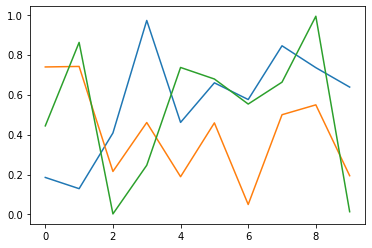

In [2]:
from tools.timelogger import TimeLogger
import numpy as np
import time
T = TimeLogger()
# Dict with random numpy column vectors
data = {'a': np.random.rand(10), 'b': np.random.rand(10), 'c': np.random.rand(10)}
print(data)
T.create_metric('a')
T.create_metric('b')
T.create_metric('c')
for i in range(0,len(data['a'])):
    T.log_time('a', data['a'][i])
    T.log_time('b', data['b'][i])
    T.log_time('c', data['c'][i])

T.visualize_results()

In [41]:
a = {}
a["hej"] = []